In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as linalg
from sklearn.preprocessing import PolynomialFeatures

In [29]:
data = pd.read_csv('Q1.csv')
data.head()

,-9.998362247726646501e-01,-2.003750933008717483e-03
0,-0.995816,-0.167316
1,-0.994624,0.185285
2,-0.992936,-0.269734
3,-0.991663,-0.102222
4,-0.988909,0.012695


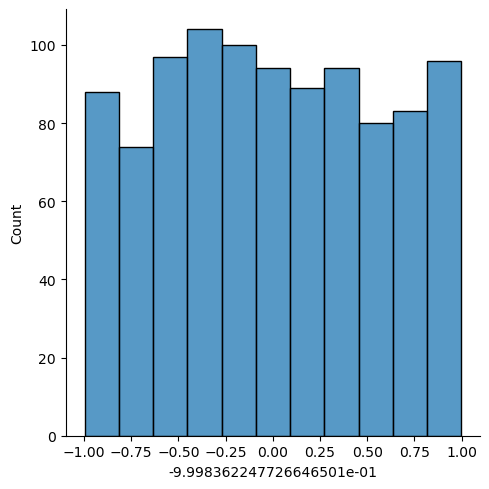

In [42]:
sns.displot(data=data, x='-9.998362247726646501e-01')

# Ridge Regression

In [6]:
def getRank(S, epsilon):
    idx = 0
    for sigma in S:
        if sigma > epsilon:
            idx += 1
    return idx

In [10]:
def ridgeRegression(A,Y, alpha):
    U, S, Vt =  linalg.svd(A)
    r = getRank(S,1e-15)
    theta = np.zeros((1,len(Vt)))
    for i in range(0,r):
        ratio = S[i] / (S[i] ** 2 + alpha)
        theta += np.dot(U[:,i],Y) * ratio * Vt[i,:]
    return theta[0]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

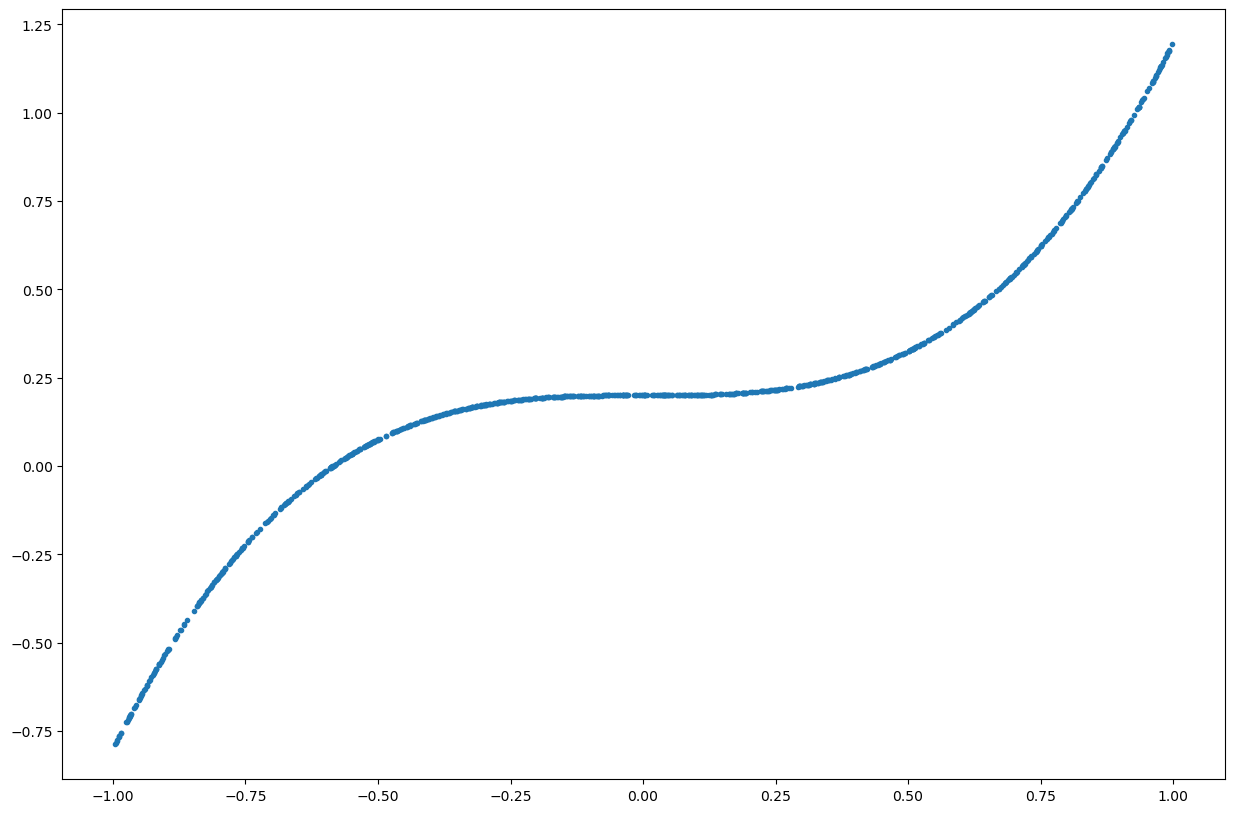

In [47]:
# Generate random data
np.random.seed(0)
X = data['-9.998362247726646501e-01'].tolist()
X = np.sort(X,axis=0)
Y = X**3-X*2+2*X+0.2
# Y = data['-2.003750933008717483e-03'].tolist()

# Make plot bigger
plt.figure(figsize=(15,10))
plt.plot(X,Y,'.')

deg = 50
poly = PolynomialFeatures(degree=deg)


# Find ridge regression parameters and plot trendline
alpha = 100
A = np.append(np.ones((len(Y),1)),X,axis=1)
theta = ridgeRegression(A,Y,alpha)
z = theta[0]+theta[1]*X
plt.plot(X,z,'r',label=r'Ridge Regression with $\alpha$={}'.format(alpha))

plt.legend()
plt.show()

# Lasso 